# Project:  Time of Day Patterns in SF Police Incidents

Copyright (c) Dec 2015. All Rights Reserved. 

##Overview
We analyze the police incident statistics from the summer of 2014 in the City fo San Francisco. We observe that there is a time of day pattern in the number of incidents, with a trough around 4 am and a couple of peaks: one narrow peak for the 12 Noon hour, and a broad evening peak for the hours of 5, and 6 pm. Further, we observe that assaults and robberies are a higher fraction of the overall number of incidents at the trough hour when compared to the peak hours. 

##Data
We analyze a dataset for San Francisco police incidents reported during the summer of 2014 (months of June, July and August). The dataset can be found at https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/sanfrancisco_incidents_summer_2014.csv. This dataset is a small portion of the full dataset which can be obtained from https://data.sfgov.org/. 

##Overall Pattern
The graph below shows the number of incidents in the dataset for each hour in the day.  We observe that the number of incidents has a trough at 4 am, with 3 - 6 am having less than 500 incidents each, while there are two peaks: one corresponding to the 12 Noon hour, and another corresponding to the 5 and 6 pm hours. 

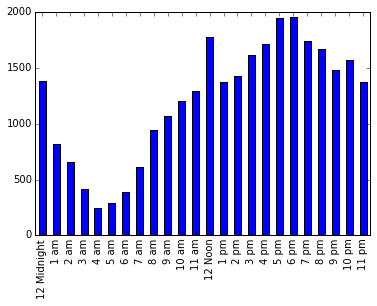

In [45]:
# imports
import pandas as pd
import matplotlib as plt
%matplotlib inline

# Load Data
data = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

# Add a column for the nearest hour at which the crime occured
hours = ['12 Midnight', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am' , '11 am', \
         '12 Noon', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm' , '11 pm' ]
def extractHour(str): # Round time to nearest hour
    hr, min = map(int, str.split(':')) # 'x:y' -> x,y -> hr, min
    return hours[hr]

data['hour'] = data['Time'].apply(lambda x: extractHour(x))
h = data['hour'].value_counts().reindex(hours).plot(kind='bar')

##Incident Categories
Next we wanted to get an idea of the various incident categories and how much they contributed to the full dataset. From the histogram below of number of incidents for each category, we see that the dataset is dominated by "LARCENY/THEFT" incident reports, and the top 9 categories dwarf the others.

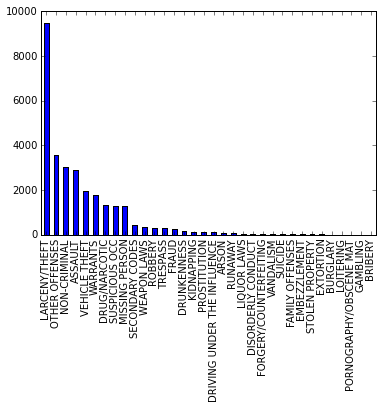

In [18]:
categories = data['Category'].value_counts()
categories.plot(kind='bar'); 

##Categories Comparison at Peak and Trough hours
Next we wanted to see if the mix of incident categories was different during the trough and the two peaks. Since the incident numbers are different, we need to normalize the counts by total count so we can easily compare the plots. It is quite clear from the plots below that at the trough (4 am hour), there are relatively more assaults and robberies as compared to the peak hours. 

In [72]:
category_order = list(categories.keys())
trough = data[data['hour'] == '4 am']
peak_noon = data[data['hour'] == '12 Noon']
peak_5pm = data[data['hour'] == '5 pm']
peak_6pm = data[data['hour'] == '6 pm']


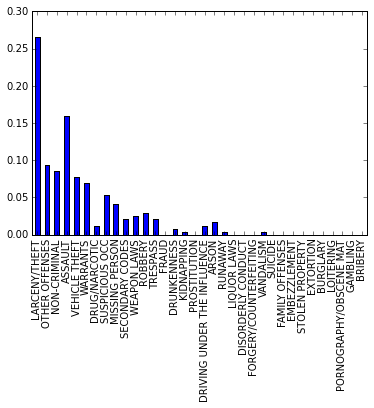

In [76]:
trough_freq = trough['Category'].value_counts()
trough_freq /= float(sum(trough_freq))
h = trough_freq.reindex(category_order).plot(kind='bar')

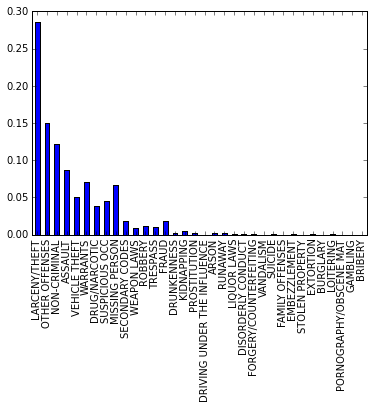

In [77]:
peak_noon_freq = peak_noon['Category'].value_counts()
peak_noon_freq /= float(sum(peak_noon_freq))
h = peak_noon_freq.reindex(category_order).plot(kind='bar')

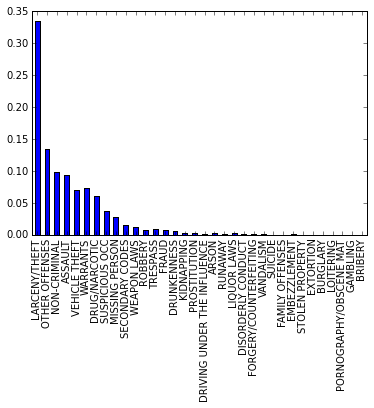

In [78]:
peak_5pm_freq = peak_5pm['Category'].value_counts()
peak_5pm_freq /= float(sum(peak_5pm_freq))
h = peak_5pm_freq.reindex(category_order).plot(kind='bar')

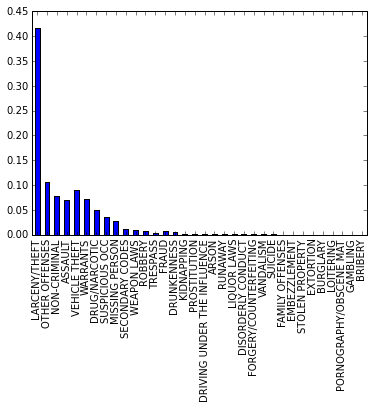

In [79]:
peak_6pm_freq = peak_6pm['Category'].value_counts()
peak_6pm_freq /= float(sum(peak_6pm_freq))
h = peak_6pm_freq.reindex(category_order).plot(kind='bar')